## Rainfall Prediction Using Machine Learning

#### 1. Import Required Libraries


In [566]:
import pandas as pd
import numpy as np

#### 2. Dataset Loading

In [569]:
df = pd.read_csv("weatherdatafinal.csv")

#### 3. Initial Data Exploration


In [572]:
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,ankara,2022-04-01,24.2,8.6,16.5,24.2,7.4,16.3,-3.0,30.0,...,15.4,8,10.0,2022-04-01T06:32:59,2022-04-01T19:12:40,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"17129099999,17130099999,17127099999,1713109999..."
1,ankara,2022-04-02,22.4,14.3,18.6,22.4,14.3,18.6,-9.3,14.5,...,22.7,9,10.0,2022-04-02T06:31:23,2022-04-02T19:13:41,0.04,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"17129099999,17130099999,17135099999,1712709999..."
2,ankara,2022-04-03,18.2,10.2,13.9,18.2,10.2,13.9,-3.9,29.8,...,21.0,9,10.0,2022-04-03T06:29:48,2022-04-03T19:14:41,0.07,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"17129099999,17130099999,17127099999,1713109999..."
3,ankara,2022-04-04,15.6,4.3,11.0,15.6,4.3,10.9,-3.0,38.7,...,21.9,8,10.0,2022-04-04T06:28:12,2022-04-04T19:15:42,0.10,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"17129099999,17130099999,17127099999,1713109999..."
4,ankara,2022-04-05,19.3,10.0,14.2,19.3,10.0,14.2,-0.3,38.2,...,14.5,6,10.0,2022-04-05T06:26:37,2022-04-05T19:16:43,0.13,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"17129099999,17130099999,17127099999,1713109999..."


In [574]:
df.tail()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
3287,ankara,2016-03-28,5.9,2.6,4.2,4.8,-0.2,1.8,-1.9,65.8,...,18.7,7,NaN,2016-03-28T06:38:39,2016-03-28T19:09:03,0.66,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"17129099999,17130099999,17127099999,1713109999..."
3288,ankara,2016-03-29,9.7,-1.6,4.7,8.6,-3.4,3.8,-3.3,58.3,...,24.3,9,NaN,2016-03-29T06:37:03,2016-03-29T19:10:04,0.70,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"17129099999,17130099999,17135099999,1712709999..."
3289,ankara,2016-03-30,14.2,1.5,8.1,14.2,1.5,8.0,0.1,59.1,...,18.9,7,NaN,2016-03-30T06:35:26,2016-03-30T19:11:05,0.73,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"17129099999,17130099999,17135099999,1712709999..."
3290,ankara,2016-03-31,17.5,2.9,10.5,17.5,2.9,10.5,0.3,54.5,...,24.2,9,NaN,2016-03-31T06:33:50,2016-03-31T19:12:05,0.75,Clear,Clear conditions throughout the day.,clear-day,"17129099999,17130099999,17127099999,1713109999..."
3291,ankara,2016-04-01,20.6,3.2,12.4,20.6,1.5,12.1,0.5,48.8,...,24.7,9,NaN,2016-04-01T06:32:14,2016-04-01T19:13:06,0.80,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"17129099999,17130099999,17127099999,1713109999..."


In [576]:
df.shape

(3292, 33)

#### 4. Check the Data Type

In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3292 non-null   object 
 1   datetime          3292 non-null   object 
 2   tempmax           3292 non-null   float64
 3   tempmin           3292 non-null   float64
 4   temp              3292 non-null   float64
 5   feelslikemax      3292 non-null   float64
 6   feelslikemin      3292 non-null   float64
 7   feelslike         3292 non-null   float64
 8   dew               3292 non-null   float64
 9   humidity          3292 non-null   float64
 10  precip            3292 non-null   float64
 11  precipprob        3292 non-null   int64  
 12  precipcover       3292 non-null   float64
 13  preciptype        1288 non-null   object 
 14  snow              3292 non-null   float64
 15  snowdepth         3292 non-null   float64
 16  windgust          2609 non-null   float64


#### 5. Data Preprocessing

##### 5.1 Removal of Non-Numerical Features

In [583]:
nonnumerical_columns = df.select_dtypes(include=['object']).columns
nonnumerical_columns

Index(['name', 'datetime', 'preciptype', 'sunrise', 'sunset', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')

The columns with datatype object cannot be directly used to train the model

In [586]:
df = df.drop(columns = nonnumerical_columns)

In [588]:
df.dtypes

tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
moonphase           float64
dtype: object

##### 5.2 Target Variable Creation

In [591]:
df['Rain'] = df['precip'].apply(lambda x: 1 if x > 0 else 0)
#change the continuos value of rain to binary values

In [593]:
df.corr()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,Rain
tempmax,1.000000,0.919516,0.983837,0.995461,0.924785,0.983487,0.741610,-0.755091,-0.121654,-0.195948,...,-0.154806,-0.521521,-0.526462,0.646904,0.787603,0.787631,0.765868,0.148072,-0.003282,-0.195948
tempmin,0.919516,1.000000,0.969414,0.912231,0.992509,0.965007,0.865124,-0.584240,-0.025589,0.014947,...,-0.116271,-0.622666,-0.260999,0.578017,0.682407,0.682236,0.640903,0.135399,-0.001662,0.014947
temp,0.983837,0.969414,1.000000,0.976658,0.969107,0.996728,0.798391,-0.712375,-0.090226,-0.123416,...,-0.135544,-0.581938,-0.428784,0.636849,0.774214,0.774194,0.740467,0.147737,-0.003944,-0.123416
feelslikemax,0.995461,0.912231,0.976658,1.000000,0.921819,0.982278,0.755384,-0.734193,-0.116131,-0.186926,...,-0.146517,-0.509977,-0.514483,0.643008,0.775829,0.775890,0.758425,0.135404,-0.003771,-0.186926
feelslikemin,0.924785,0.992509,0.969107,0.921819,1.000000,0.971946,0.867399,-0.583096,-0.032034,-0.001831,...,-0.093153,-0.601441,-0.282076,0.577167,0.684106,0.683947,0.645789,0.133161,-0.003215,-0.001831
feelslike,0.983487,0.965007,0.996728,0.982278,0.971946,1.000000,0.809396,-0.698236,-0.088441,-0.123312,...,-0.121675,-0.567445,-0.429495,0.632404,0.767479,0.767494,0.737147,0.141097,-0.004804,-0.123312
dew,0.741610,0.865124,0.798391,0.755384,0.867399,0.809396,1.000000,-0.167221,0.101443,0.218735,...,-0.084057,-0.537063,-0.038954,0.391526,0.471245,0.470940,0.431679,0.095786,0.002338,0.218735
humidity,-0.755091,-0.584240,-0.712375,-0.734193,-0.583096,-0.698236,-0.167221,1.000000,0.295172,0.463062,...,0.113577,0.310274,0.663737,-0.662249,-0.746654,-0.747073,-0.744319,-0.123417,0.002552,0.463062
precip,-0.121654,-0.025589,-0.090226,-0.116131,-0.032034,-0.088441,0.101443,0.295172,1.000000,0.369313,...,0.044104,-0.145000,0.322478,-0.162939,-0.179187,-0.179528,-0.208010,-0.007692,-0.023089,0.369313
precipprob,-0.195948,0.014947,-0.123416,-0.186926,-0.001831,-0.123312,0.218735,0.463062,0.369313,1.000000,...,0.118894,-0.262796,0.623995,-0.178635,-0.276922,-0.277647,-0.306259,0.028298,-0.021619,1.000000


##### 5.3 Feature Selection

In [596]:
new_columns = ['cloudcover', 'humidity', 'uvindex','solarradiation', 'solarenergy', 'sealevelpressure','temp','windgust','Rain']
df = df[new_columns]

In [598]:
df.head(8) #updated columns with necessary data

,cloudcover,humidity,uvindex,solarradiation,solarenergy,sealevelpressure,temp,windgust,Rain
0,82.5,30.0,8,181.0,15.4,1012.1,16.5,42.8,0
1,57.7,14.5,9,264.0,22.7,1005.4,18.6,70.6,0
2,55.4,29.8,9,241.6,21.0,1008.1,13.9,83.5,0
3,39.1,38.7,8,254.5,21.9,1015.8,11.0,41.8,0
4,76.0,38.2,6,168.1,14.5,1009.4,14.2,33.1,0
5,29.9,43.0,9,283.7,24.5,1008.8,12.9,25.6,0
6,58.3,54.7,7,179.3,15.5,1007.7,12.5,76.3,1
7,64.1,64.1,8,205.3,17.8,1004.2,12.0,55.4,1


##### 5.4 Checking Missing Values

In [601]:
df.isnull().sum()

cloudcover            0
humidity              0
uvindex               0
solarradiation        0
solarenergy           0
sealevelpressure      1
temp                  0
windgust            683
Rain                  0
dtype: int64

The NaN values of the column were replaced with the column's mean 

In [604]:
df.fillna(df.mean(), inplace=True) #update the same dataset using inplace

In [606]:
df.isnull().sum()

cloudcover          0
humidity            0
uvindex             0
solarradiation      0
solarenergy         0
sealevelpressure    0
temp                0
windgust            0
Rain                0
dtype: int64

#### 6. Data Analysis

In [609]:
import matplotlib.pyplot as plt
import seaborn as sns

##### 6.1 Distribution of Selected Features

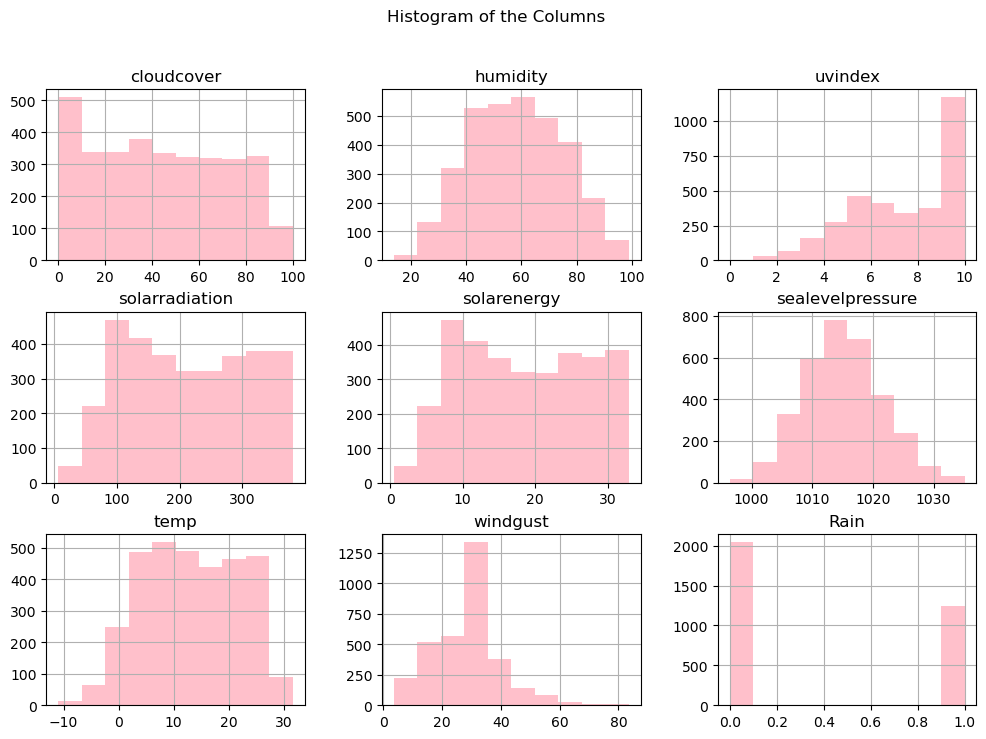

In [612]:
#A Histogram is ploted to understand the patterns of data before modeling 
df.hist(figsize=(12,8), color = "pink")
plt.suptitle("Histogram of the Columns")
plt.show()

##### 6.2 Correlation Analysis

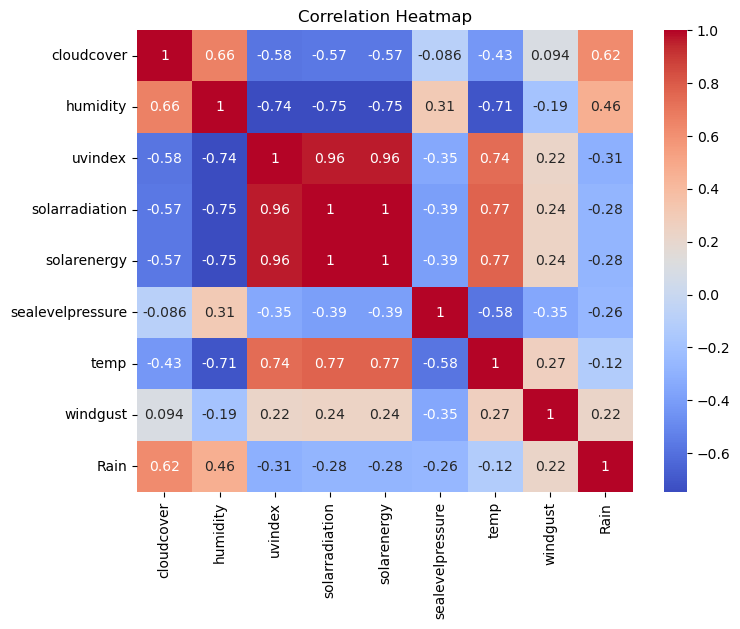

In [615]:
#A Correlation Heatmap is plotted to show how strongly each feature is related to the target: Rain
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##### 6.3 Target Variable Scatter Plot

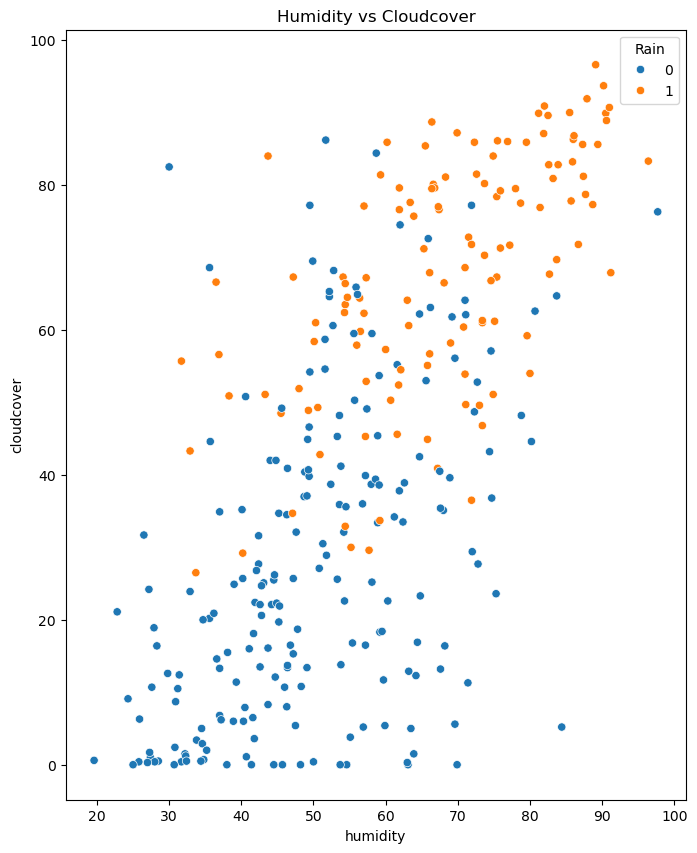

In [618]:
# Taking 10% sample of the data
df_sample = df.sample(frac=0.1, random_state=42)  # using 10% of rows as data

# Scatterplot helps us see if rainy days happen at certain values of the two features.
plt.figure(figsize=(8,10))
sns.scatterplot(x='humidity', y='cloudcover', hue='Rain', data=df_sample)
plt.title("Humidity vs Cloudcover")
plt.show()

#### 7. Separating the Target Variable and the Features

##### 7.1 Seperating Feature Columns

In [622]:
X = df.drop(columns=['Rain'])
X

,cloudcover,humidity,uvindex,solarradiation,solarenergy,sealevelpressure,temp,windgust
0,82.5,30.0,8,181.0,15.4,1012.1,16.5,42.8
1,57.7,14.5,9,264.0,22.7,1005.4,18.6,70.6
2,55.4,29.8,9,241.6,21.0,1008.1,13.9,83.5
3,39.1,38.7,8,254.5,21.9,1015.8,11.0,41.8
4,76.0,38.2,6,168.1,14.5,1009.4,14.2,33.1
...,...,...,...,...,...,...,...,...
3287,80.8,65.8,7,215.5,18.7,1011.8,4.2,31.7
3288,30.3,58.3,9,282.9,24.3,1017.5,4.7,27.7
3289,37.7,59.1,7,220.7,18.9,1021.5,8.1,25.9
3290,15.6,54.5,9,282.0,24.2,1024.1,10.5,18.4


##### 7.2 Seperating Target Variable

In [625]:
y = df['Rain']
y.head(8)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
Name: Rain, dtype: int64

##### 7.3 Train-Test Split

In [628]:
from sklearn.model_selection import train_test_split

In [630]:
#Using 70% of data as Train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

In [632]:
X_train.head(2)

,cloudcover,humidity,uvindex,solarradiation,solarenergy,sealevelpressure,temp,windgust
59,46.2,36.4,10,348.8,30.0,1007.4,25.7,43.9
1037,87.6,83.9,3,91.7,8.3,1016.1,-0.8,14.8


In [634]:
X_test.head(2)

,cloudcover,humidity,uvindex,solarradiation,solarenergy,sealevelpressure,temp,windgust
3098,48.5,45.5,7,224.0,19.2,1011.1,21.4,29.5
3161,12.3,64.2,5,131.9,11.5,1024.3,9.4,14.8


In [636]:
len(X)

3292

In [638]:
len(X_train),len(X_test)

(2304, 988)

#### 8. Machine Learning Model Training

##### 8.1 Logistic Regression Model

In [642]:
from sklearn.linear_model import LogisticRegression

In [644]:
lr = LogisticRegression()
lr

LogisticRegression()

In [646]:
from sklearn.preprocessing import StandardScaler

Scaling the Features using StandardScaler to ensure the model sees all features fairly

In [649]:
#if temp 1-100, uvindex 0-4000 StandardScaler prevents feature domination

scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train)
X_test_final = scaler.transform(X_test)

In [651]:
lr.fit(X_train_final, y_train)
lr_prob_before = lr.predict_proba(X_test_final)[:, 1]

In [653]:
lr_pred = lr.predict(X_test_final)

In [655]:
lr_score = lr.score(X_test_final,y_test)

##### 8.2 Random Forest Classifier

In [658]:
from sklearn.ensemble import RandomForestClassifier

In [660]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf

RandomForestClassifier(n_estimators=200, random_state=42)

In [753]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [755]:
#variable for plotting ROC 
rf_prob_before = rf.predict_proba(X_test)[:, 1] 

In [757]:
rf_pred = rf.predict(X_test)

In [759]:
rf_score = rf.score(X_test,y_test)

##### 8.3 Support Vector Machine (SVM)

In [675]:
from sklearn.svm import SVC

In [677]:
svm = SVC(kernel='rbf')
svm

SVC()

In [762]:
svm.fit(X_train_final, y_train)

SVC(random_state=42)

In [764]:
svm_score_before = svm.decision_function(X_test_final)

In [766]:
svm_pred = svm.predict(X_test_final)

In [768]:
svm_score = svm.score(X_test_final,y_test)

#### 9. Model Evaluation and Comparison

In [771]:
from sklearn.metrics import accuracy_score

In [688]:
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [690]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Precision:", precision_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8633603238866396
Random Forest Precision: 0.8470254957507082

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       608
           1       0.85      0.79      0.82       380

    accuracy                           0.86       988
   macro avg       0.86      0.85      0.85       988
weighted avg       0.86      0.86      0.86       988



In [692]:
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Precision:", precision_score(y_test,svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.8775303643724697
SVM Precision: 0.8912386706948641

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       608
           1       0.89      0.78      0.83       380

    accuracy                           0.88       988
   macro avg       0.88      0.86      0.87       988
weighted avg       0.88      0.88      0.88       988



In [694]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression Precision:", precision_score(y_test,lr_pred))
print("\nClassification Report:\n", classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.8653846153846154
Logistic Regression Precision: 0.8518518518518519

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       608
           1       0.85      0.79      0.82       380

    accuracy                           0.87       988
   macro avg       0.86      0.85      0.86       988
weighted avg       0.86      0.87      0.86       988



##### 9.1 Accuracy Comparison

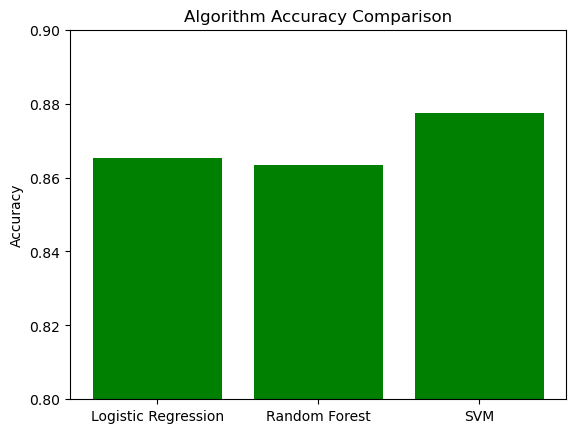

In [697]:
models_acc = ['Logistic Regression', 'Random Forest', 'SVM']
algorithm_acc = [accuracy_score(y_test, lr_pred),accuracy_score(y_test, rf_pred),accuracy_score(y_test, svm_pred)]
plt.bar(models_acc, algorithm_acc, color = "green")
plt.ylabel("Accuracy")
plt.title("Algorithm Accuracy Comparison")
plt.ylim(0.8, 0.9)
plt.show()

##### 9.2 Precision Comparison

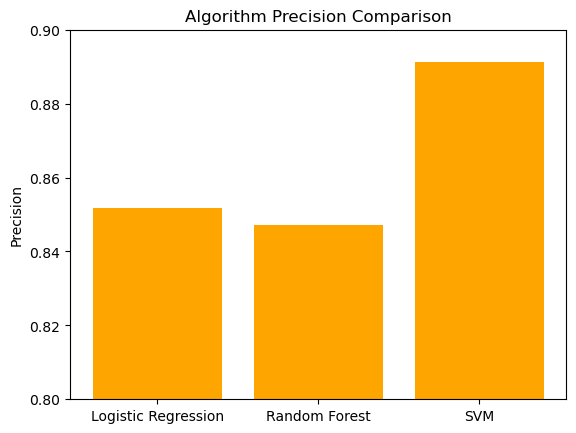

In [700]:
precision_lr = precision_score(y_test, lr_pred)
precision_rf = precision_score(y_test, rf_pred)
precision_svm = precision_score(y_test, svm_pred)
models_prec = ['Logistic Regression', 'Random Forest', 'SVM']
algorithm_prec = [precision_lr,precision_rf,precision_svm]
plt.bar(models_prec, algorithm_prec, color="orange")
plt.ylabel("Precision")
plt.title("Algorithm Precision Comparison")
plt.ylim(0.8, 0.9)
plt.show()

##### 9.3 Confusion Matrix Analysis

In [703]:
from sklearn.metrics import confusion_matrix

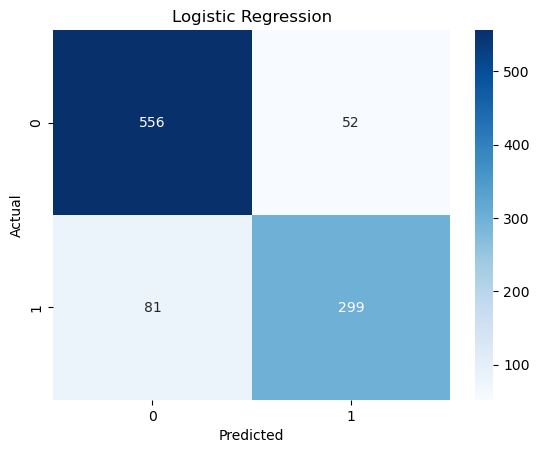

In [705]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

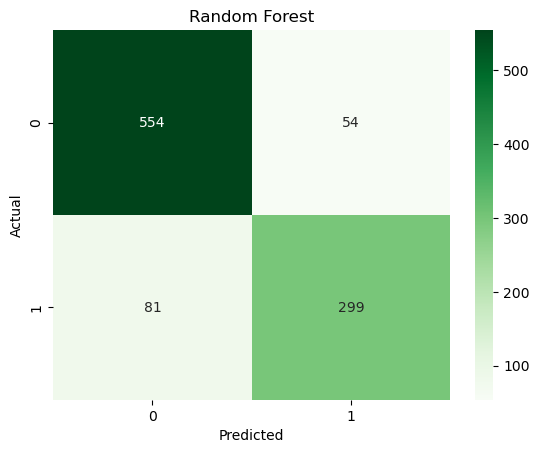

In [707]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

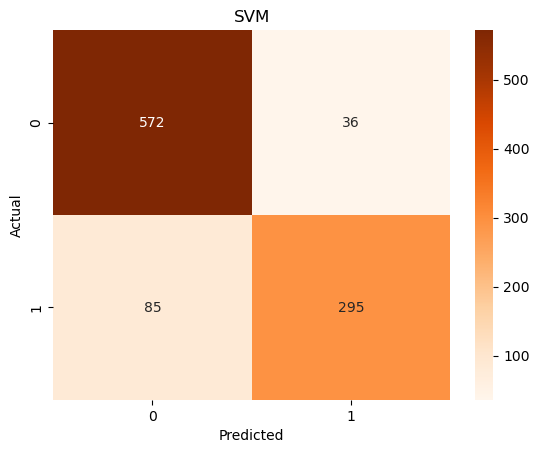

In [709]:
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 10. Hyperparameter tuning using GridSearchCV

In [712]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

##### 10.1 Conduct the Hyperparameter tuning using GridSearchCV for Random Forest

In [715]:
param_grid = {
    'n_estimators': [100, 200, 300], #searching 3 size forest
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [717]:
grid_search.fit(X_train, y_train) #Fit it to  training data

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

##### 10.1.1 Get best Parameters for the model

In [719]:
print("Best Hyperparameters are as follows:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

Best Hyperparameters are as follows: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [720]:
rf_tuned_pred = best_rf.predict(X_test)

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, rf_tuned_pred))
print("Tuned Random Forest Precision:", precision_score(y_test, rf_tuned_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_tuned_pred))

Tuned Random Forest Accuracy: 0.861336032388664
Tuned Random Forest Precision: 0.8542274052478134

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       608
           1       0.85      0.77      0.81       380

    accuracy                           0.86       988
   macro avg       0.86      0.84      0.85       988
weighted avg       0.86      0.86      0.86       988



##### 10.1.2 Making ROC Curve

In [722]:
#Probability of Rain(1) After tuning
rf_prob_after = best_rf.predict_proba(X_test)[:, 1]

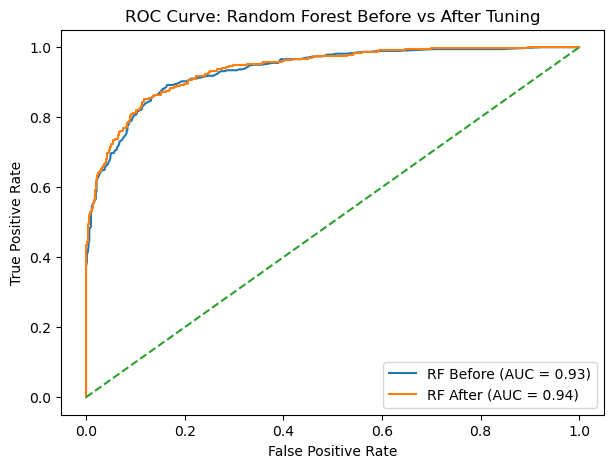

In [723]:
from sklearn.metrics import roc_curve, auc

#compares true labels to predicted probability
fpr_before, tpr_before, _ = roc_curve(y_test, rf_prob_before)
#higher the AUC better class seperation
auc_before = auc(fpr_before, tpr_before)

fpr_after, tpr_after, _ = roc_curve(y_test, rf_prob_after)
auc_after = auc(fpr_after, tpr_after)

plt.figure(figsize=(7, 5))
plt.plot(fpr_before, tpr_before, label=f'RF Before (AUC = {auc_before:.2f})')
plt.plot(fpr_after, tpr_after, label=f'RF After (AUC = {auc_after:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest Before vs After Tuning')
plt.legend()
plt.show()

##### 10.2 Conduct the Hyperparameter tuning using GridSearchCV for Logistic Regression

In [725]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [1000]
}

lr = LogisticRegression(random_state=42)

grid_lr = GridSearchCV(
    lr,
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_

print("Best Logistic Regression Parameters:", grid_lr.best_params_)

Best Logistic Regression Parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


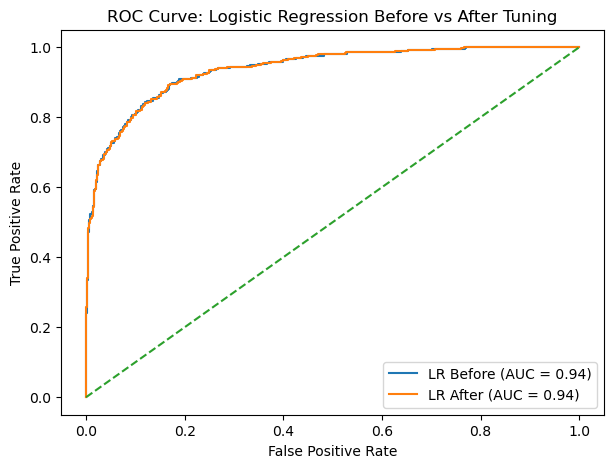

In [726]:
fpr_before, tpr_before, _ = roc_curve(y_test, lr_prob_before)
auc_before = auc(fpr_before, tpr_before)

# AFTER tuning
lr_prob_after = best_lr.predict_proba(X_test)[:, 1]

fpr_after, tpr_after, _ = roc_curve(y_test, lr_prob_after)
auc_after = auc(fpr_after, tpr_after)

plt.figure(figsize=(7, 5))
plt.plot(fpr_before, tpr_before, label=f'LR Before (AUC = {auc_before:.2f})')
plt.plot(fpr_after, tpr_after, label=f'LR After (AUC = {auc_after:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression Before vs After Tuning')
plt.legend()
plt.show()

In [727]:
lr_tuned_pred = best_lr.predict(X_test)

print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, lr_tuned_pred))

print("Tuned Logistic Regression Precision:", precision_score(y_test, lr_tuned_pred))

print("\nClassification Report:\n", classification_report(y_test, lr_tuned_pred))

Tuned Logistic Regression Accuracy: 0.8674089068825911
Tuned Logistic Regression Precision: 0.8567335243553008

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       608
           1       0.86      0.79      0.82       380

    accuracy                           0.87       988
   macro avg       0.86      0.85      0.86       988
weighted avg       0.87      0.87      0.87       988



##### 10.3 Conduct the Hyperparameter tuning using GridSearchCV for SVM

In [729]:
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC(random_state=42)

grid_svm = GridSearchCV(
    svm,
    param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_

print("Best SVM Parameters:", grid_svm.best_params_)


Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


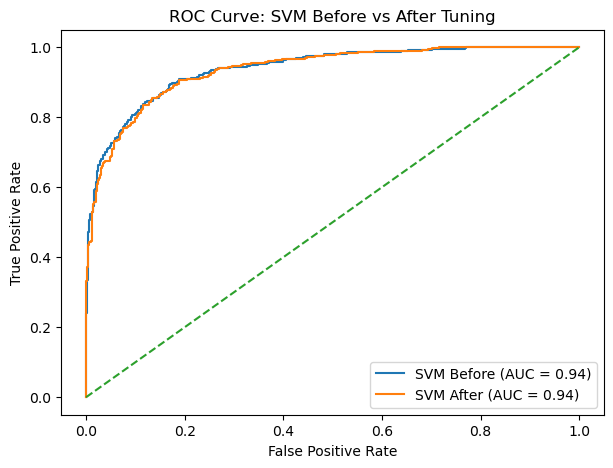

In [730]:
svm_score_after = best_svm.decision_function(X_test)

fpr_after, tpr_after, _ = roc_curve(y_test, svm_score_after)
auc_after = auc(fpr_after, tpr_after)

plt.figure(figsize=(7, 5))
plt.plot(fpr_before, tpr_before, label=f'SVM Before (AUC = {auc_before:.2f})')
plt.plot(fpr_after, tpr_after, label=f'SVM After (AUC = {auc_after:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: SVM Before vs After Tuning')
plt.legend()
plt.show()

In [731]:
svm_tuned_pred = best_svm.predict(X_test)

print("Tuned SVM Accuracy:", accuracy_score(y_test, svm_tuned_pred))

print("Tuned SVM Precision:", precision_score(y_test, svm_tuned_pred))

print("\nClassification Report:\n", classification_report(y_test, svm_tuned_pred))

Tuned SVM Accuracy: 0.8633603238866396
Tuned SVM Precision: 0.8613569321533924

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       608
           1       0.86      0.77      0.81       380

    accuracy                           0.86       988
   macro avg       0.86      0.85      0.85       988
weighted avg       0.86      0.86      0.86       988



##### 10.4 Comparison of Accuracy Before & After tuning

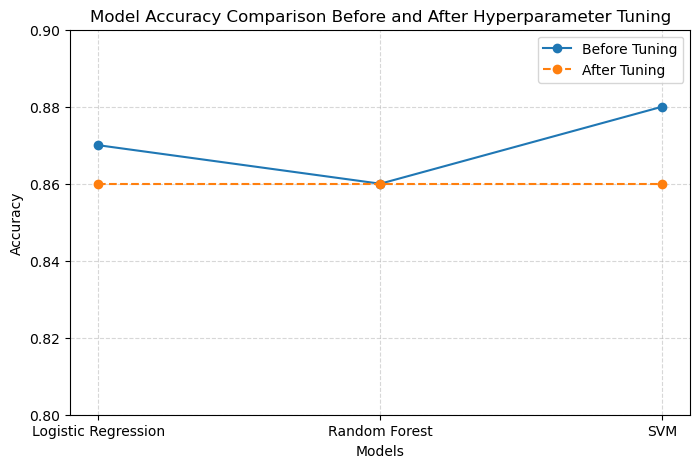

In [733]:
models = ['Logistic Regression', 'Random Forest', 'SVM']

# Replace with YOUR actual values
accuracy_before = [0.87, 0.86, 0.88]
accuracy_after = [0.86, 0.86, 0.86]

plt.figure(figsize=(8, 5))

plt.plot(models, accuracy_before, marker='o', linestyle='-',
         label='Before Tuning')
plt.plot(models, accuracy_after, marker='o', linestyle='--',
         label='After Tuning')

plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Model Accuracy Comparison Before and After Hyperparameter Tuning')
plt.ylim(0.80, 0.90)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

#### 11. Testing with Sample Data

In [735]:
new_data = pd.DataFrame({
    'cloudcover': [50],     
    'humidity': [65],         
    'uvindex': [5],            
    'solarradiation': [200],   
    'solarenergy': [5],
    'sealevelpressure': [1011],
    'temp': [27],             
    'windgust': [15] 
})

In [736]:
new_data = new_data[X_train.columns]
prediction = best_rf.predict(new_data)

In [737]:
label = {0: "No rain", 1: "Rain"}
print("Prediction:", label[prediction[0]])

Prediction: Rain
